# Linear algebra lab

* Distance of a point from a line
* Intersection between a plane and a line
* Find regression line through optimisation
* Search word2vec

For linear algebra, we are going to use the module numpy.

In [ ]:
import numpy as np
from numpy.linalg import norm
from scipy.optimize import minimize_scalar, minimize

import matplotlib.pyplot as plt

### Happy mouth plot, the distance between a point and a line

Find the distance between the line $(1, 2, 3)^\top + t \cdot (1, -1, 1)^\top$ and the point $\bar c = (1, -1, 1)^\top$.

Defining two vectors in numpy and finding the distance between them can be done by running the following:
```
p = np.asarray([1, -1, 1])
q = np.asarray([np.pi, -3, 2])
distance = norm(p-q)
```

Write your code in the cell below in places marked 'your code here'.

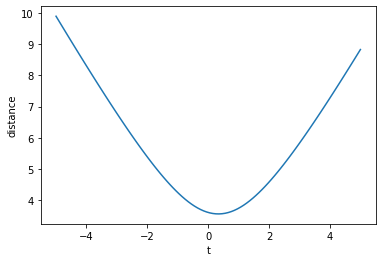

Minimum at t=0.4 (distance 3.6)
Exact minimum at t=0.333333


In [ ]:
def line(t):
  return # your code here
c = # your code here

T = np.linspace(-5, 5, 100)
P = list()
for t in T:
  P.append(norm(line(t) - c))

plt.figure()
plt.plot(T, P)
plt.xlabel("t")
plt.ylabel("distance")
plt.show()

print("Minimum at t=%.1f (distance %.1f)" % (T[np.argmin(P)], np.min(P)))
print("Exact minimum at t=%f" % minimize_scalar(lambda t: norm(line(t) - c)).x)

Try out some other values for the vectors and see what happens. Also, the following code defines where to find the distances. The numbers -5 and 5 are the outer limits to this interval. Try to change the interval and see how the plot changes.

```
T = np.linspace(-5, 5, 100)
```

If you got the cell above to work then your could extend the line to any (countable) number of dimensions. How? Try this for 2 (easy to check on paper) or 5 (higher but still reasonably small) dimensions.

### Plane and line intersection
 
Find the intersection between the following line and plane:
 
* The line: $(4, 2, 3)^\top + t \cdot (4, 5, -3)^\top$
* The plane: $( \bar p-\bar q ) \cdot \bar n = 0$, where $\bar q =(1, 1, 1)^\top$, $\bar n =(-1, -1, -1)^\top$
 
The outcome of $( \bar p-\bar q ) \cdot \bar n$ is the distance, $d$, from the line scaled by the length of the normal vector as $( \bar p-\bar q ) \cdot \bar n = d \cdot |\bar n |$. When $d$ is zero, the point $\bar p$ is in the plane. Because of this, finding a $t$ for the intersection is a matter of finding the $t$ that minimizes the absolute value of the equation for the plane. Why do we not normalise $\bar n$ here? Should we?
 
A dot product in numpy between vectors u and v can be written as ```u.dot(v)```.

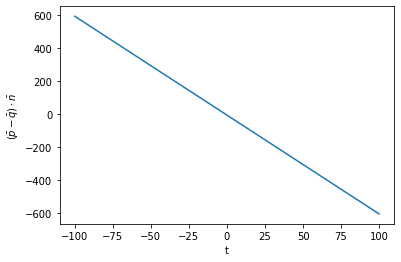

Intersection at t=-1.0 (value 0.1)
Exact intersection at t=-1.000000


In [ ]:
def line(t):
  return # your code here

def plane(p):
  n = # your code here
  q = # your code here
  return # your code here

T = np.linspace(-100, 100, 100)
P = list()
for t in T:
  P.append(plane(line(t)))

plt.figure()
plt.plot(T, P)
plt.xlabel("t")
plt.ylabel("$( \\bar p - \\bar q ) \\cdot \\bar n$")
plt.show()

print("Intersection at t=%.1f (value %.1f)" % (T[np.argmin(np.abs(P))], np.min(np.abs(P))))
print("Exact intersection at t=%f" % minimize_scalar(lambda t: np.abs(plane(line(t)))).x)

Try extending the above code to higher dimensions.

# Finding a regression line

In lecture 12, we worked with regression lines. We chose the linear model that minimised the square of the errors. To try this, we first have to create some data.

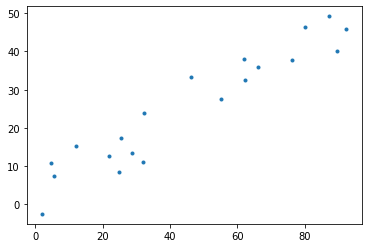

In [ ]:
# Define the true values for our regression
beta = np.zeros(2)
beta[0] = 3 # intercept
beta[1] = .5 # slope

# Generate the data
X = np.random.uniform(0, 100, size=20)
y = beta[0] + X*beta[1] + np.random.normal(0, 5, size=X.shape)

# Plot the data
plt.figure()
plt.scatter(X, y, marker='.')
plt.show()

Our model for such data from lecture 12 is a straight line as $\hat y = \beta_0 + \beta_1 \cdot x$ . Using the data matrix $X$, we can get values for $\hat y$ by using matrix addition and scalar multiplication.

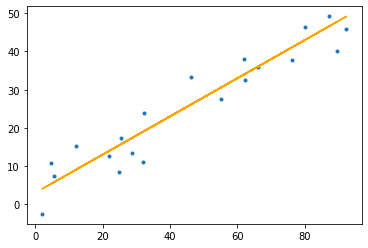

In [ ]:
# The predicion function that gives us y hat.
def y_hat(X, beta):
  return # your code here

plt.figure()
plt.scatter(X, y, marker='.')
plt.plot(X, y_hat(X, [3, .5]), 'orange')
plt.show()

We can find the line that minimises the residuals by finding the covariance matrix. However, we could also simply try new numbers for $\beta$ and keep it if it's better than our old beta. For this we have to define a loss function. Ours will be the squared error (as in the slides) $f_\text{loss} = \sum (y-\hat y)^2$.

Random noise can be added to the beta vector by running:
```
beta = beta + np.random.normal(0, .1, size=beta.shape)
```



Loss before optimisation 102956.9


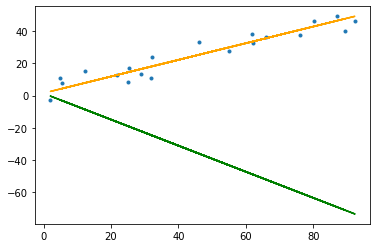

Loss after optimisation 459.8


In [ ]:
def loss(beta):
  return # your code here

beta = np.random.normal(size=2)
print("Loss before optimisation %.1f" % loss(beta))

plt.figure()
plt.scatter(X, y, marker='.')
plt.plot(X, y_hat(X, beta), 'green')

for i in range(100):
  new_beta = beta + np.random.normal(0, .1, size=beta.shape)
  if loss(new_beta) < loss(beta):
    beta = new_beta
  # print(loss(beta))
plt.plot(X, y_hat(X, beta), 'orange')
plt.show()

print("Loss after optimisation %.1f" % loss(beta))

Uncomment the print statement in the loop above to see how the loss changes over iterations. Try modifying the data and see if the optimisation still works. What happens if we don't run the for loop for 100 iterations? Is there a better loss function (e.g. absolute error)?

# Word embedding

Semantic word embeddings are used for many applications in computational linguistics. The inovation here is not only that semantic relations can be repressented as a vector space, but that these vectors were found using only unlabeled data. No human has sat down and modified any vectors so that they fit our understanddig of the words. Also, it should be noted that a huge drawbacj with the embedding we will be using here is that any word only has one vector (i.e. the word 'interest' in the senses 'interest rate' and 'interest in cooking' are encoded as the same vector).

First we need to download a pre-trained model and load it into memory.

*Thanks to Michael Guerzhoy in Toronto for sharing the embedding data form their course "Machine Learning and Data Mining".*
http://www.cs.toronto.edu/~guerzhoy/411/proj3/ 

In [ ]:
!wget http://www.cs.toronto.edu/~guerzhoy/411/proj3/embeddings.npz
!ls -l

--2020-10-21 09:26:32--  http://www.cs.toronto.edu/~guerzhoy/411/proj3/embeddings.npz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22112846 (21M)
Saving to: ‘embeddings.npz’

embeddings.npz      100%[===================>]  21.09M  41.2MB/s    in 0.5s    

2020-10-21 09:26:33 (41.2 MB/s) - ‘embeddings.npz’ saved [22112846/22112846]

total 21600
-rw-r--r-- 1 root root 22112846 Mar  9  2017 embeddings.npz
drwxr-xr-x 1 root root     4096 Oct 14 16:31 sample_data


In [ ]:
data = np.load('embeddings.npz', allow_pickle=True)
vectors = data["emb"]
index2word = {int(index):word for index, word in data["word2ind"].flatten()[0].items()}
word2index = {word:index for index, word in index2word.items()}
vocabulary = {word for index, word in index2word.items()}

assert len(vocabulary) == vectors.shape[0]
assert np.all([np.isclose(norm(vectors[i, :]), 1) for i in range(vectors.shape[0])])

The embedding vectors are stored in the variable ```vectors```. You can convert from word to vector index and back using the dictionaries ```index2word``` and ```word2index```. Finally, the full vocabuilary can be found in the set ```vocabulary```.



## Semantic search

All the vectors in ```vectors``` have the length 1. That means tht we can find the cosine distance between them simply by using a dot product. To get the dimensions right when doing a matrix multiplication (i.e. a fast way of doing several dot products) the vector for any single word be be transformed as: 

```
v_man = np.vstack(vectors[word2index['man'], :])
```





In [ ]:
v_man = np.vstack(vectors[word2index['man'], :])
v_man.shape

(128, 1)

This vector $\bar v_\text{man}$ can be multiplied by the full matrix with embedding vectors, resuting in a new vector with all the pairwise coside distances between the full vocabulary and our chosen word as:
```
pairwise_distances = np.matmul(vectors, v_man).ravel()
```
The ```.ravel()``` at the end ensures that we get a vector out that is 'flattend' and can e run though numpys sorting methods. Running the following will give us a list of indices that are ordered from liwest cosine score to the highest. Which end of the list is the interesting one (think about what happens to $cos(\theta)$ when $\theta$ is really small)?
```
ordered_indices = np.argsort(pairwise_distances)
```
What are the five closest words to out selected word? Try some other words and/or expan your search to the top 10 (or higher). Are the words semantically similar?


In [ ]:
pairwise_distances = np.matmul(vectors, v_man).ravel()
assert np.all(np.isfinite(pairwise_distances))
ordered_indices = np.argsort(pairwise_distances)

for i in ordered_indices[-5:]:
  print(index2word[int(i)], pairwise_distances[i])

boy 0.44254684
guy 0.4457075
journal 0.44858992
woman 0.4634432
man 0.99999976


## Embedding vectors for semantic "arithmetic"

Apparently the following is possible in this space: $\bar v_\text{king} - \bar v_\text{man} + \bar v_\text{woman} \approx \bar v_\text{queen}$. Try to reproduce this result. It could be done by:

* Finding the vectors for 'man', 'king', and 'woman'.
* Do the vector addition/subtractions
* Normalise the resulting vector (we can call it $\bar p$)
* Search for the closest vectors to $\bar p$ in the full set of vectors
* Decode the indices to words and see if 'queen' is in the top 100

I (the intructor) have not tried this myself. I'm looking forward to see if this works with the given embedding.

In [ ]:
assert 'man' in vocabulary
assert 'woman' in vocabulary
assert 'king' in vocabulary
assert 'queen' in vocabulary

v = vectors[word2index['paris'], :]
# v = vectors[word2index['king'], :] - vectors[word2index['man'], :] + vectors[word2index['woman'], :]
# v = v / norm(v)
v = np.vstack(v)

pairwise_distances = np.matmul(vectors, v).ravel()
assert np.all(np.isfinite(pairwise_distances))
ordered_indices = np.argsort(pairwise_distances)

for i in ordered_indices[-50:]:
  print(index2word[int(i)], pairwise_distances[i])

flabbergastingly 0.39805967
fests 0.39821255
confined 0.3986593
lucrative 0.39866957
cristoffer 0.39883238
apparently 0.39894396
blackmore 0.40068734
itself 0.40190357
jibe 0.4022178
admired 0.4023301
reminder 0.40240854
kenneth 0.40242934
individuality 0.40243214
ahem 0.40307656
labours 0.40351626
pie 0.40529686
chattering 0.40599126
cheerleaders 0.40622252
mac 0.40703207
ropes 0.4077654
replete 0.40790117
jackson 0.40799397
reservation 0.41061088
division 0.4106317
sunset 0.41125938
housewarming 0.41149
fi 0.4121854
cued 0.4123111
television 0.41374648
powders 0.41394937
superceded 0.41493076
faulted 0.41548282
jeunet 0.41795766
chew 0.41804567
chemicals 0.42001876
ginger 0.42067605
memento 0.422221
roots 0.4239317
cheer 0.42480415
treat 0.4250774
prakazrel 0.4257301
estimate 0.4295282
spits 0.4299159
sunglasses 0.43515766
ineptitude 0.43802944
schwartznager 0.43831483
doorway 0.4400884
sizemore 0.45066613
suspiria 0.46274775
paris 1.0000001
